In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import functools

In [57]:
merged_df = pd.read_csv("climate_merged.csv").replace(-9999, np.nan)

In [58]:
MEAS_COLUMNS = ['HLY-TEMP-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL', 'HLY-DEWP-NORMAL', 'HLY-DEWP-10PCTL', 'HLY-DEWP-90PCTL', 'HLY-PRES-NORMAL', 'HLY-PRES-10PCTL', 'HLY-PRES-90PCTL', 'HLY-CLDH-NORMAL', 'HLY-HTDH-NORMAL', 'HLY-CLOD-PCTCLR', 'HLY-CLOD-PCTFEW', 'HLY-CLOD-PCTSCT', 'HLY-CLOD-PCTBKN', 'HLY-CLOD-PCTOVC', 'HLY-HIDX-NORMAL', 'HLY-WCHL-NORMAL', 'HLY-WIND-AVGSPD', 'HLY-WIND-PCTCLM', 'HLY-WIND-VCTDIR', 'HLY-WIND-VCTSPD', 'HLY-WIND-1STDIR', 'HLY-WIND-1STPCT', 'HLY-WIND-2NDDIR', 'HLY-WIND-2NDPCT']


In [59]:
QUANT_MEAS = ['HLY-TEMP-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL', 'HLY-DEWP-NORMAL', 'HLY-DEWP-10PCTL', 'HLY-DEWP-90PCTL', 'HLY-PRES-NORMAL', 'HLY-PRES-10PCTL', 'HLY-PRES-90PCTL', 'HLY-CLDH-NORMAL', 'HLY-HTDH-NORMAL', 'HLY-CLOD-PCTCLR', 'HLY-CLOD-PCTFEW', 'HLY-CLOD-PCTSCT', 'HLY-CLOD-PCTBKN', 'HLY-CLOD-PCTOVC', 'HLY-HIDX-NORMAL', 'HLY-WCHL-NORMAL', 'HLY-WIND-AVGSPD', 'HLY-WIND-PCTCLM', 'HLY-WIND-VCTDIR', 'HLY-WIND-VCTSPD', 'HLY-WIND-1STPCT', 'HLY-WIND-2NDPCT']


In [60]:
def make_histogram(colname):
    measurements = merged_df[colname][merged_df["years_" + colname] != 0]
    plt.hist(measurements)
    plt.xlabel(colname)
    plt.ylabel("Count")

/var/folders/8y/dh79x8bd48sft54kk8xh3qj80000gn/T/ipykernel_77979/3373089023.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


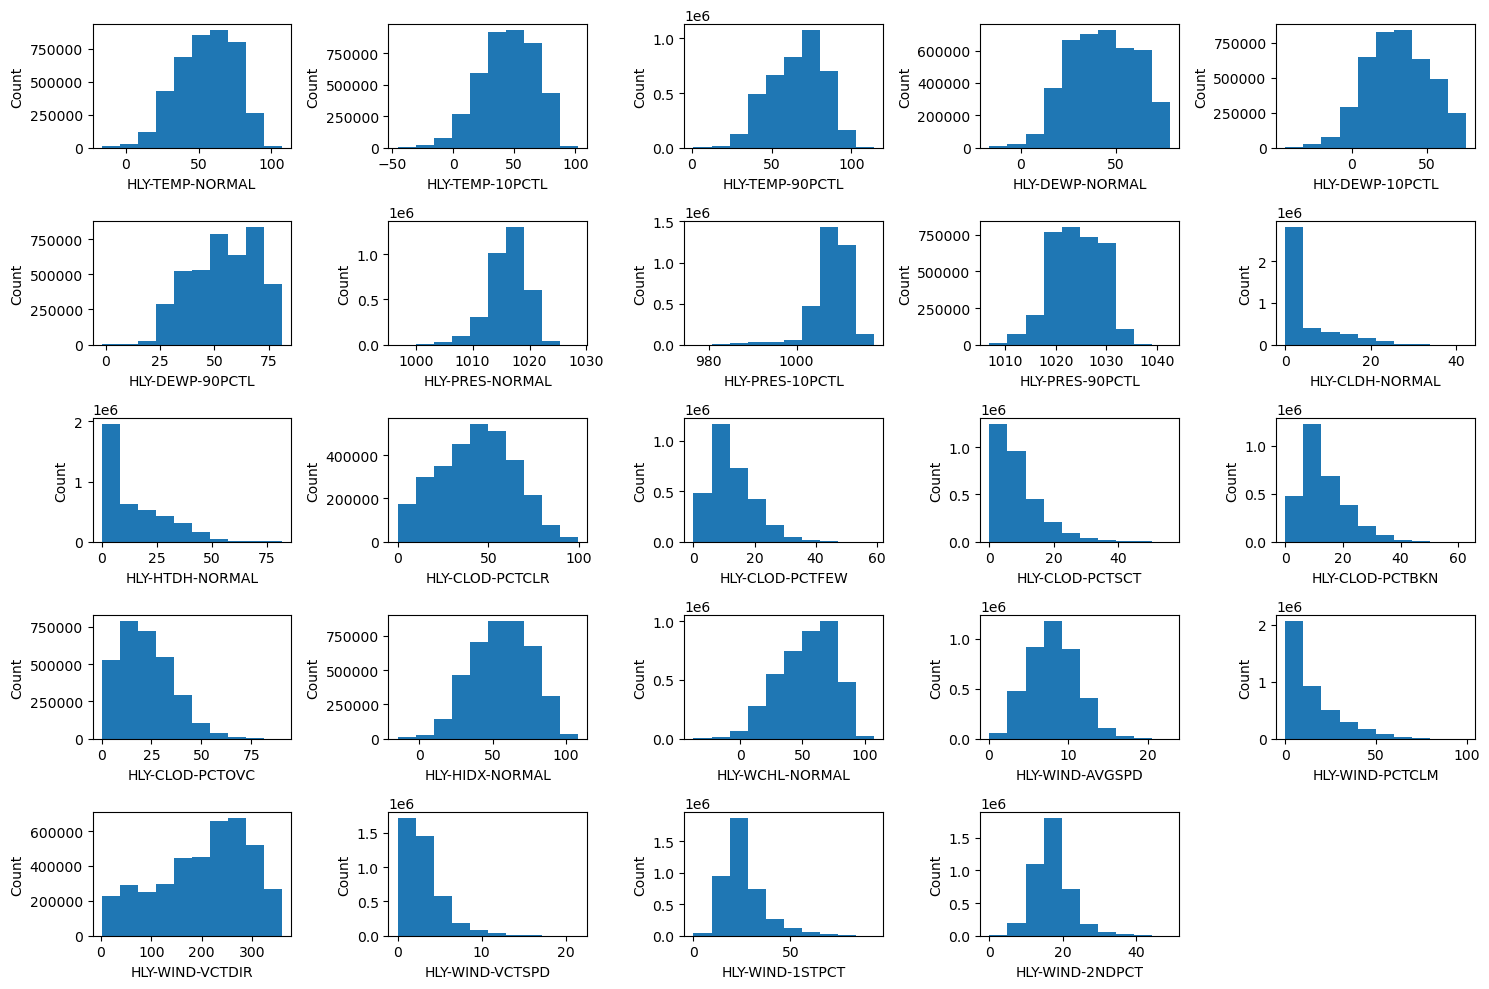

In [61]:
plt.figure(figsize = (15,10))
for i, colname in enumerate(QUANT_MEAS):
    plt.subplot(5, 5, i + 1)
    plt.tight_layout()
    make_histogram(colname)

In [62]:
quant_df = merged_df[QUANT_MEAS]

In [63]:
# quant_df = quant_df[np.any(quant_df.values == -9999, axis = 1)]
# This is not a very good way to do the correlations because we can do better than to drop every row with missing values from correlation calculations

In [64]:
# Better way to deal with missing values in correlation matrix
quant_df = quant_df.replace(-9999, np.nan)

In [65]:
corr_matrix = quant_df.corr()

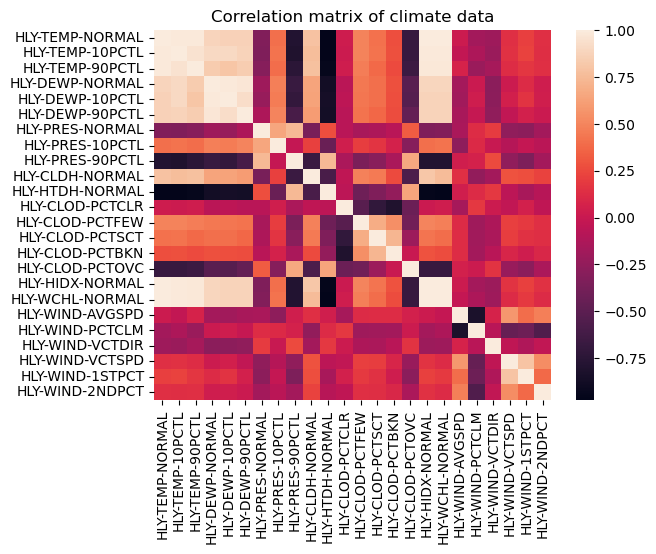

In [66]:
sns.heatmap(corr_matrix)
plt.title("Correlation matrix of climate data")
plt.show()

In [67]:
quant_df

,HLY-TEMP-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,HLY-DEWP-NORMAL,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-PRES-NORMAL,HLY-PRES-10PCTL,HLY-PRES-90PCTL,HLY-CLDH-NORMAL,...,HLY-CLOD-PCTBKN,HLY-CLOD-PCTOVC,HLY-HIDX-NORMAL,HLY-WCHL-NORMAL,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,HLY-WIND-1STPCT,HLY-WIND-2NDPCT
0,81.0,77.9,84.0,76.0,73.6,78.4,1008.8,1006.1,1011.5,16.0,...,NaN,NaN,87.5,81.0,8.2,12.9,56.0,4.1,22.5,19.0
1,80.7,77.2,83.7,75.9,73.4,78.3,1008.1,1005.2,1010.8,15.7,...,38.1,43.0,87.0,80.7,7.9,13.6,56.0,3.6,22.7,17.4
2,80.5,77.0,84.0,75.8,73.4,78.1,1007.5,1004.7,1010.0,15.5,...,NaN,NaN,86.5,80.5,7.8,12.9,59.0,3.8,21.6,19.4
3,80.3,77.0,83.8,75.7,73.4,78.3,1007.1,1004.4,1009.7,15.3,...,NaN,NaN,86.0,80.3,7.8,14.3,53.0,3.5,26.1,19.3
4,80.1,77.0,83.3,75.6,73.0,78.1,1007.0,1004.2,1009.5,15.1,...,NaN,NaN,85.7,80.1,7.9,12.9,58.0,3.6,25.8,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090915,18.2,-2.0,33.8,12.0,-11.0,30.0,NaN,NaN,NaN,0.0,...,NaN,NaN,18.2,8.8,8.5,8.8,278.0,2.7,23.2,18.4
4090916,17.7,-2.2,33.1,11.7,-11.0,28.9,NaN,NaN,NaN,0.0,...,NaN,NaN,17.7,8.2,8.5,10.1,281.0,2.7,22.5,19.9
4090917,17.3,-2.9,33.1,11.6,-11.0,28.9,NaN,NaN,NaN,0.0,...,NaN,NaN,17.3,7.7,8.4,9.0,282.0,2.8,23.0,20.5
4090918,16.8,-3.1,33.1,11.4,-11.0,28.4,NaN,NaN,NaN,0.0,...,NaN,NaN,16.8,7.4,8.3,11.0,285.0,2.8,21.0,17.8


In [68]:
np.any(quant_df.values == -9999)

False

In [69]:
loc_df = merged_df[QUANT_MEAS + ["LATITUDE", "LONGITUDE"]]

In [70]:
GOOD_MEAS_COLUMNS = ['HLY-TEMP-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL', 'HLY-DEWP-NORMAL', 'HLY-DEWP-10PCTL', 'HLY-DEWP-90PCTL', 'HLY-CLDH-NORMAL', 'HLY-HTDH-NORMAL', 'HLY-HIDX-NORMAL', 'HLY-WCHL-NORMAL', 'HLY-WIND-AVGSPD', 'HLY-WIND-PCTCLM', 'HLY-WIND-VCTDIR', 'HLY-WIND-VCTSPD', 'HLY-WIND-1STDIR', 'HLY-WIND-1STPCT', 'HLY-WIND-2NDDIR', 'HLY-WIND-2NDPCT']


In [71]:
df2 = merged_df[GOOD_MEAS_COLUMNS + ["LATITUDE", "LONGITUDE", "STATION", "month"]]

In [72]:
grouped2 = df2.groupby(["STATION","month"]).apply(lambda x: x.mean())

In [73]:
grouped2

HLY-TEMP-NORMAL  HLY-TEMP-10PCTL  HLY-TEMP-90PCTL  \
STATION     month                                                      
AQW00061705 1            82.879839        78.976344        86.143683   
            2            82.956101        79.160863        86.244048   
            3            83.044892        79.528360        86.205242   
            4            82.836806        79.335833        85.917778   
            5            81.995833        78.571640        84.792608   
...                            ...              ...              ...   
USW00094985 8            67.630242        59.484005        75.597984   
            9            59.778750        48.782361        70.698333   
            10           46.826478        35.030645        59.399866   
            11           33.559722        20.530694        46.726944   
            12           21.449462         3.892339        35.113575   

                   HLY-DEWP-NORMAL  HLY-DEWP-10PCTL  HLY-DEWP-90PCTL  \
STATION     month                                                      
AQW00061705 1            76.512903        73.795430        79.313441   
            2            76.797321        74.195982        79.451637   
            3            76.937231        74.381989        79.420430   
            4            76.986389        74.400000        79.580556   
            5            76.029973        72.743548        78.865591   
...                            ...              ...              ...   
USW00094985 8            58.688710        49.586156        67.272043   
            9            51.082639        39.758611        62.679167   
            10           37.584543        25.118817        50.437231   
            11           25.639444        12.073194        38.799722   
            12           15.554570        -3.270430        30.284812   

                   HLY-CLDH-NORMAL  HLY-HTDH-NORMAL  HLY-HIDX-NORMAL  \
STATION     month                                                      
AQW00061705 1            17.879839         0.000000        91.357661   
            2            17.956101         0.000000        91.779911   
            3            18.044892         0.000000        92.013978   
            4            17.836806         0.000000        91.650694   
            5            16.995833         0.000000        89.487231   
...                            ...              ...              ...   
USW00094985 8             5.013575         2.383468        67.826613   
            9             2.226944         7.450833        59.779583   
            10            0.355376        18.532930        46.826478   
            11            0.015694        31.458333        33.559722   
            12            0.000000        43.550538        21.449462   

                   HLY-WCHL-NORMAL  HLY-WIND-AVGSPD  HLY-WIND-PCTCLM  \
STATION     month                                                      
AQW00061705 1            82.879839         9.084812         8.096371   
            2            82.956101         9.168155         7.609673   
            3            83.044892         8.290323         9.264113   
            4            82.836806         8.691806         9.274306   
            5            81.995699        10.587903         7.247984   
...                            ...              ...              ...   
USW00094985 8            67.593414         6.587097        15.063306   
            9            59.215833         7.358750        12.965694   
            10           43.786425         8.404839        10.198925   
            11           27.191944         8.857500         8.618056   
            12           12.501882         8.679301         8.556452   

                   HLY-WIND-VCTDIR  HLY-WIND-VCTSPD  HLY-WIND-1STDIR  \
STATION     month                                                      
AQW00061705 1            58.213710         4.058468         5.127688   
            2            51.330357         4.218006    

In [74]:
grouped3 = grouped2.reset_index()

In [75]:
grouped3

,STATION,month,HLY-TEMP-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,HLY-DEWP-NORMAL,HLY-DEWP-10PCTL,HLY-DEWP-90PCTL,HLY-CLDH-NORMAL,HLY-HTDH-NORMAL,...,HLY-WIND-AVGSPD,HLY-WIND-PCTCLM,HLY-WIND-VCTDIR,HLY-WIND-VCTSPD,HLY-WIND-1STDIR,HLY-WIND-1STPCT,HLY-WIND-2NDDIR,HLY-WIND-2NDPCT,LATITUDE,LONGITUDE
0,AQW00061705,1,82.879839,78.976344,86.143683,76.512903,73.795430,79.313441,17.879839,0.000000,...,9.084812,8.096371,58.213710,4.058468,5.127688,25.940457,3.106183,17.917876,-14.3306,-170.7136
1,AQW00061705,2,82.956101,79.160863,86.244048,76.797321,74.195982,79.451637,17.956101,0.000000,...,9.168155,7.609673,51.330357,4.218006,5.190476,28.235565,2.895833,18.728869,-14.3306,-170.7136
2,AQW00061705,3,83.044892,79.528360,86.205242,76.937231,74.381989,79.420430,18.044892,0.000000,...,8.290323,9.264113,67.630376,4.345161,4.557796,31.384543,3.897849,18.116398,-14.3306,-170.7136
3,AQW00061705,4,82.836806,79.335833,85.917778,76.986389,74.400000,79.580556,17.836806,0.000000,...,8.691806,9.274306,88.811111,5.794167,3.006944,36.649306,5.609722,17.766111,-14.3306,-170.7136
4,AQW00061705,5,81.995833,78.571640,84.792608,76.029973,72.743548,78.865591,16.995833,0.000000,...,10.587903,7.247984,105.322581,8.581720,3.052419,39.857661,4.041667,26.574194,-14.3306,-170.7136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,USW00094985,8,67.630242,59.484005,75.597984,58.688710,49.586156,67.272043,5.013575,2.383468,...,6.587097,15.063306,237.970430,1.438306,6.979839,16.417339,6.033602,14.325403,44.6381,-90.1875
5600,USW00094985,9,59.778750,48.782361,70.698333,51.082639,39.758611,62.679167,2.226944,7.450833,...,7.358750,12.965694,215.790278,1.627917,5.205556,17.634444,6.401389,14.449167,44.6381,-90.1875
5601,USW00094985,10,46.826478,35.030645,59.399866,37.584543,25.118817,50.437231,0.355376,18.532930,...,8.404839,10.198925,261.254032,2.082527,7.129032,18.327285,7.076613,16.482258,44.6381,-90.1875
5602,USW00094985,11,33.559722,20.530694,46.726944,25.639444,12.073194,38.799722,0.015694,31.458333,...,8.857500,8.618056,267.252778,2.565278,7.552778,19.755694,6.988889,17.362083,44.6381,-90.1875


In [76]:
counties = pd.read_csv("uscounties.csv")

In [77]:
def haversine(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance

In [78]:
# For each county
# For each weather station
# Determine the distance from the county to the weather station
# Take the 5 closest weather stations
# Then for each month
# Determine the average of each weather variable for that month

In [79]:
stations_df = grouped3[grouped3.month == 1][["STATION", "LATITUDE","LONGITUDE"]].reset_index(drop = True)

In [80]:
@functools.cache
def get_k_closest_stations(fips, k):
    distances_df = stations_df.copy()
    
    that_county = counties.query(f"county_fips == {fips}")
    county_lat = that_county.lat.iloc[0]
    county_lng = that_county.lng.iloc[0]
    
    station_locs = zip(stations_df.LATITUDE, stations_df.LONGITUDE)
    distances = [haversine(county_lat, county_lng, lat, lng) for lat, lng in station_locs]
    distances = pd.Series(distances)
    distances_df["distance"] = distances
    sorted_distances = distances_df.sort_values(by = "distance", ascending = True)
    sorted_distances.reset_index(drop = True, inplace = True)
    return sorted_distances.STATION[0:k]
    

In [81]:
get_k_closest_stations(6037, 5)

0    USW00023152
1    USW00023174
2    USW00003159
3    USW00023136
4    USW00023119
Name: STATION, dtype: object

In [82]:
counties2 = counties.query("state_id != 'AK' & state_id != 'HI'")

In [83]:
def get_monthly_average(fips, month):
    stations = get_k_closest_stations(fips, 5)
    relevant_stations = grouped3.query(f"month == {month} & STATION in @stations")
    relevant_stations = relevant_stations.drop(columns = ["STATION", "month", "LATITUDE", "LONGITUDE"])
    return relevant_stations.mean().to_frame().T

In [84]:
counties3 = counties2.reset_index(drop = True)

In [85]:
def get_month_df(month):
    vals = pd.concat([get_monthly_average(fips, month) for fips in counties2.county_fips], ignore_index = True)
    for colname in counties3:
        vals[colname] = counties3[colname]
    vals["month"] = month
    return vals.copy()

# Y'all, giga_df is the thing we've all been waiting for. The final product

In [86]:
giga_df = pd.concat([get_month_df(month) for month in range(1,13)], axis = 0, ignore_index = True)

In [87]:
giga_df.to_csv("climate_normals_by_county.csv", index = False)

In [88]:
giga_df.lat

0        34.3219
1        41.8401
2        29.8578
3        33.3490
4        33.0343
          ...   
37303    47.1175
37304    41.9128
37305    33.6165
37306    31.8493
37307    26.9285
Name: lat, Length: 37308, dtype: float64

In [89]:
def get_mean(x):
    if pd.api.types.is_numeric_dtype(x):
        return x.mean()
    else:
        return x.iloc[0]

In [90]:
annual_df = giga_df.groupby("county_fips").apply(get_mean).drop(columns = ["month"])

In [91]:
annual_df.to_csv("climate_normals_annual.csv")

In [94]:
annual_df.isna().sum()

HLY-TEMP-NORMAL    0
HLY-TEMP-10PCTL    0
HLY-TEMP-90PCTL    0
HLY-DEWP-NORMAL    0
HLY-DEWP-10PCTL    0
HLY-DEWP-90PCTL    0
HLY-CLDH-NORMAL    0
HLY-HTDH-NORMAL    0
HLY-HIDX-NORMAL    0
HLY-WCHL-NORMAL    0
HLY-WIND-AVGSPD    0
HLY-WIND-PCTCLM    0
HLY-WIND-VCTDIR    0
HLY-WIND-VCTSPD    0
HLY-WIND-1STDIR    0
HLY-WIND-1STPCT    0
HLY-WIND-2NDDIR    0
HLY-WIND-2NDPCT    0
county             0
county_ascii       0
county_full        0
county_fips        0
state_id           0
state_name         0
lat                0
lng                0
population         0
dtype: int64